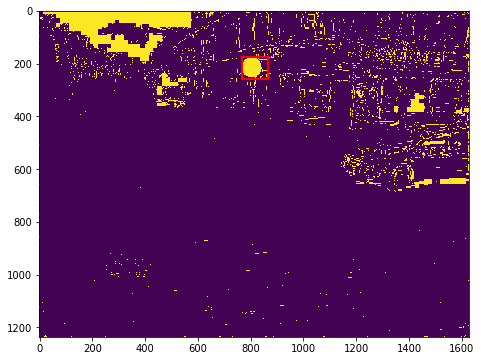

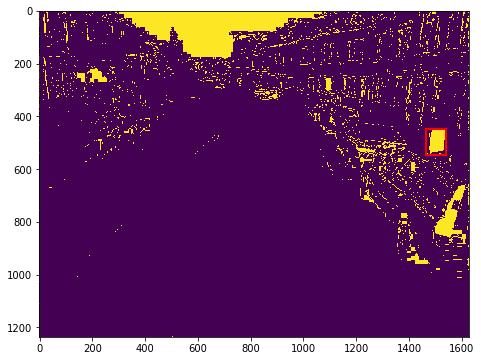

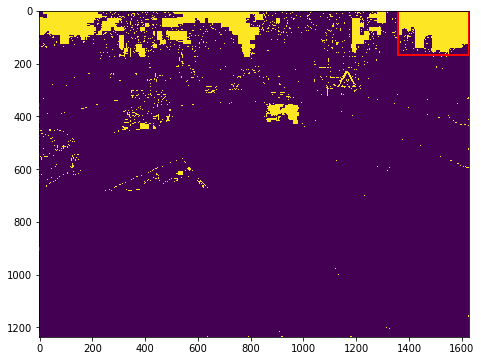

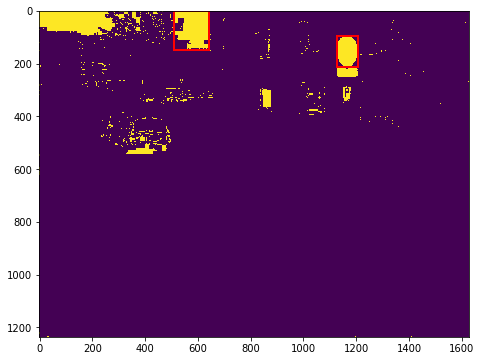

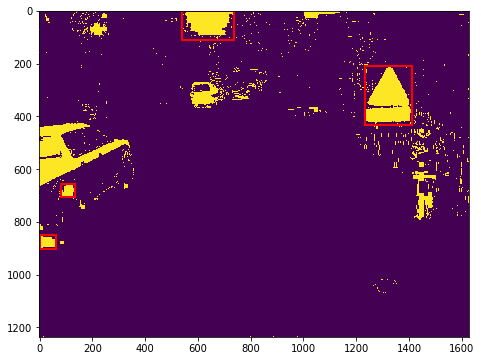

In [12]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Enable matplotline inline display
%matplotlib inline

# Import built-in modules
import os

# Import third party modules
import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, HTML
from skimage import color
from skimage import exposure
from skimage import morphology
from utils import get_files_from_dir
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from scipy.ndimage.morphology import binary_fill_holes


import matplotlib.patches as mpatches
np.seterr(divide='ignore', invalid='ignore')

path_mask = os.path.join('m1-results','week1','test','method1')
mask_filenames = get_files_from_dir(path_mask)

for i in range(5):
    
    mask_i = imageio.imread(os.path.join(path_mask, mask_filenames[i]))

    mask0 = binary_fill_holes(mask_i)

    label_image = label(mask0)
    image_label_overlay = label2rgb(label_image, image=mask0)

    fig, ax = plt.subplots(figsize=(10, 6))
    #ax.imshow(label_image)
    ax.imshow(mask0)
    
    for region in regionprops(label_image):

        # take regions with large enough areas
        if 50000 >= region.bbox_area >= 1000:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            h = maxr - minr
            w = maxc - minc
            form_factor = w / h

            if 0.5 < form_factor < 2:
                filling_ratio = region.filled_area / region.bbox_area
                
                if filling_ratio > 0.5:
                    sol = region.solidity
                    if sol>0.8:  # Esta línea es turbia, revisarla!
                        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                                  fill=False, edgecolor='red', linewidth=2)
                        ax.add_patch(rect)

